## NYC Yellow Cab Data Analysis
#### This project aims to analyze New York City's yellow cab trip data to uncover meaningful insights about taxi usage, traffic patterns, and customer behavior. The project involves comprehensive data cleaning and preprocessing to ensure data quality, storing the cleaned dataset in a database for efficient access, and performing exploratory data analysis (EDA) to reveal trends such as peak travel times, popular routes, and fare patterns. 

## Import Libraries

In [44]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sqlite3

In [12]:
# Load the dataset
df = pd.read_csv('NYC Taxi.csv')
print(df.head(10))

/var/folders/wr/qb14w8vn3g7cnbj90btf6r7c0000gn/T/ipykernel_76372/4205660687.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC Taxi.csv')


   VendorID     tpep_pickup_datetime    tpep_dropoff_datetime  \
0         1  2020-04-01T00:41:22.000  2020-04-01T01:01:53.000   
1         1  2020-04-01T00:56:00.000  2020-04-01T01:09:25.000   
2         1  2020-04-01T00:00:26.000  2020-04-01T00:09:25.000   
3         1  2020-04-01T00:24:38.000  2020-04-01T00:34:38.000   
4         2  2020-04-01T00:13:24.000  2020-04-01T00:18:26.000   
5         2  2020-04-01T00:24:36.000  2020-04-01T00:33:09.000   
6         2  2020-04-01T00:56:56.000  2020-04-01T01:09:13.000   
7         2  2020-04-01T00:06:56.000  2020-04-01T00:14:15.000   
8         1  2020-04-01T00:50:05.000  2020-04-01T01:08:54.000   
9         2  2020-04-01T00:07:10.000  2020-04-01T00:18:45.000   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           1.20         1.0                  N   
1              1.0           3.40         1.0                  N   
2              1.0           2.80         1.0                  N   
3           

## Data Handling and Processing

In [29]:
# Removing columns with too many missing values if they exist
# 'airport_fee' column is removed if it exists, as it has too many missing values
if 'airport_fee' in df.columns:
    df = df.drop(columns=['airport_fee'])
# Handling missing values - drop rows or fill missing values
# Dropping rows where 'passenger_count' and 'RatecodeID' are missing
# Filling missing values in 'congestion_surcharge' with 0
df = df.dropna(subset=['passenger_count', 'RatecodeID'])
df['congestion_surcharge'].fillna(0, inplace=True)
df


/var/folders/wr/qb14w8vn3g7cnbj90btf6r7c0000gn/T/ipykernel_76372/2699953333.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-04-01T00:41:22.000,2020-04-01T01:01:53.000,1.0,1.20,1.0,N,41,24,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
1,1,2020-04-01T00:56:00.000,2020-04-01T01:09:25.000,1.0,3.40,1.0,N,95,197,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0
2,1,2020-04-01T00:00:26.000,2020-04-01T00:09:25.000,1.0,2.80,1.0,N,237,137,1,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
3,1,2020-04-01T00:24:38.000,2020-04-01T00:34:38.000,0.0,2.60,1.0,N,68,142,1,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
4,2,2020-04-01T00:13:24.000,2020-04-01T00:18:26.000,1.0,1.44,1.0,Y,263,74,1,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218488,2,2020-04-30T23:03:12.000,2020-04-30T23:11:51.000,1.0,1.67,1.0,N,239,50,1,8.5,0.5,0.5,3.08,0.0,0.3,15.38,2.5
218489,2,2020-04-30T23:06:30.000,2020-04-30T23:16:16.000,5.0,3.53,1.0,N,141,4,1,12.0,0.5,0.5,2.00,0.0,0.3,19.75,2.5
218490,1,2020-04-30T23:13:40.000,2020-04-30T23:18:17.000,1.0,1.60,1.0,N,170,140,1,6.5,3.0,0.5,5.00,0.0,0.3,15.30,2.5
218491,1,2020-04-30T23:30:39.000,2020-04-30T23:42:56.000,1.0,6.70,1.0,N,107,168,2,20.0,3.0,0.5,0.00,0.0,0.3,23.80,2.5


In [33]:
# Convert date columns to datetime type
# Converting 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Remove duplicates
# Removing duplicate rows to ensure data quality
df = df.drop_duplicates()
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
1,1,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0
2,1,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
3,1,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
4,2,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218488,2,2020-04-30 23:03:12,2020-04-30 23:11:51,1.0,1.67,1.0,N,239,50,1,8.5,0.5,0.5,3.08,0.0,0.3,15.38,2.5
218489,2,2020-04-30 23:06:30,2020-04-30 23:16:16,5.0,3.53,1.0,N,141,4,1,12.0,0.5,0.5,2.00,0.0,0.3,19.75,2.5
218490,1,2020-04-30 23:13:40,2020-04-30 23:18:17,1.0,1.60,1.0,N,170,140,1,6.5,3.0,0.5,5.00,0.0,0.3,15.30,2.5
218491,1,2020-04-30 23:30:39,2020-04-30 23:42:56,1.0,6.70,1.0,N,107,168,2,20.0,3.0,0.5,0.00,0.0,0.3,23.80,2.5


In [48]:

# Removing outliers in trip distance and fare amount
# Filtering out rows where 'trip_distance' and 'fare_amount' are less than or equal to 0
df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]
# Calculate trip duration in minutes
# Creating a new column 'trip_duration' to store the trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
# Store the Cleaned Data in SQL
# Storing the cleaned dataset into an SQLite database for efficient querying
conn = sqlite3.connect('nyc_taxi_data.db')
df.to_sql('yellow_cab_trips', conn, if_exists='replace', index=False)
conn.close()

## Statistical Analysis

In [51]:
# Exploratory Data Analysis (EDA)
# Displaying general statistics of the dataset
stats = df.describe()
print(stats)

            VendorID           tpep_pickup_datetime  \
count  211742.000000                         211742   
mean        1.570978  2020-04-16 02:11:32.430429184   
min         1.000000            2020-02-02 21:48:34   
25%         1.000000            2020-04-08 09:43:59   
50%         2.000000     2020-04-16 09:04:35.500000   
75%         2.000000            2020-04-23 17:41:49   
max         2.000000            2020-04-30 23:59:42   
std         0.494938                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                         211742    211742.000000  211742.000000   
mean   2020-04-16 02:22:06.616839680         1.303265       2.690421   
min              2020-02-02 22:27:44         0.000000       0.010000   
25%              2020-04-08 09:53:07         1.000000       0.980000   
50%       2020-04-16 09:12:57.500000         1.000000       1.700000   
75%       2020-04-23 17:52:03.500000         1.000000       3.100000   


In [53]:
# Peak Times Analysis
# Extracting hour from pickup time
# Creating a new column 'pickup_hour' to extract the hour from 'tpep_pickup_datetime'
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

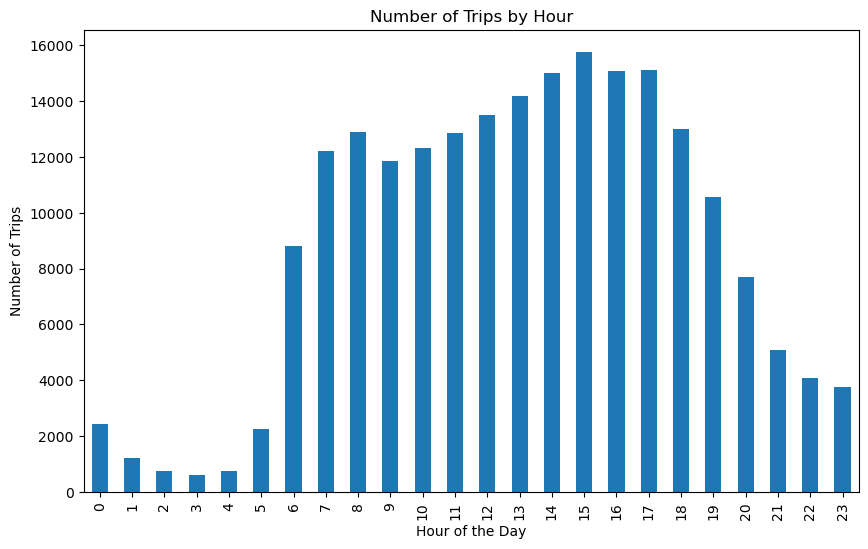

In [55]:
# Analyzing peak hours
# Plotting the number of trips by hour to identify peak times
plt.figure(figsize=(10, 6))
peak_hours = df['pickup_hour'].value_counts().sort_index()
peak_hours.plot(kind='bar', title='Number of Trips by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

#### The analysis of the number of trips by hour shows that the peak demand for NYC taxi rides occurs between 2 PM and 5 PM, with the highest number of trips around 3 PM. There is also significant activity in the morning from 7 AM to 12 PM, indicating high taxi usage during commuting hours. In contrast, the lowest number of trips occurs between 2 AM and 5 AM, which aligns with typical off-peak hours when most people are not traveling.


In [59]:
# Popular Routes
# Identifying popular routes by grouping data by 'PULocationID' and 'DOLocationID'
popular_routes = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='counts')
# Sorting and displaying the top 10 popular routes
popular_routes = popular_routes.sort_values(by='counts', ascending=False).head(10)
print(popular_routes)


       PULocationID  DOLocationID  counts
2108             75            74    1546
2109             75            75    1236
10252           263            75    1044
9276            238           238    1025
9408            239           239     997
10486           264           264     995
9407            239           238     989
8869            236            75     941
8960            236           236     933
1957             74            75     930


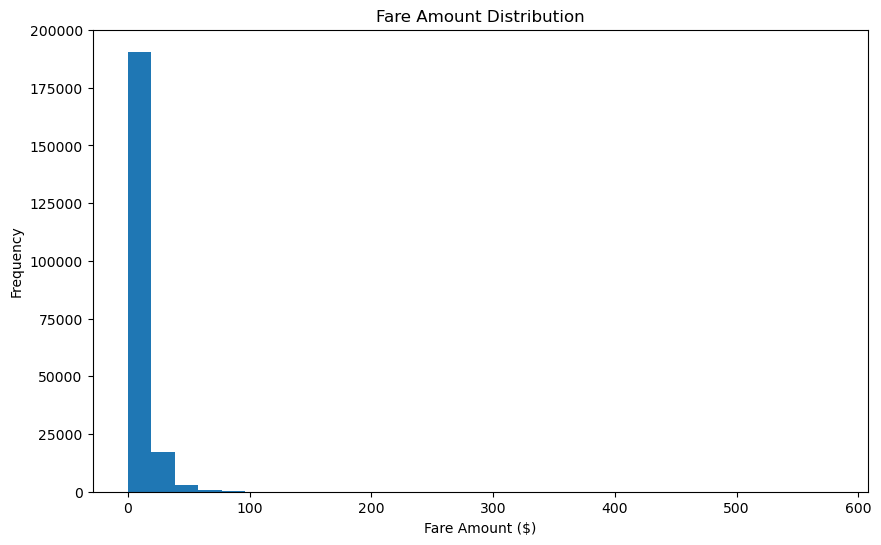

In [61]:
# Fare Pattern Analysis
# Plotting the distribution of fare amounts to analyze fare patterns
plt.figure(figsize=(10, 6))
df['fare_amount'].plot(kind='hist', bins=30, title='Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()



#### The distribution of fare amounts shows that the majority of taxi fares are relatively low, with most fares falling under $50. There are a few higher fare amounts, but they are less frequent, indicating that most trips are short distances within the city. The skewed distribution suggests that long, expensive trips are rare compared to the bulk of standard city rides.


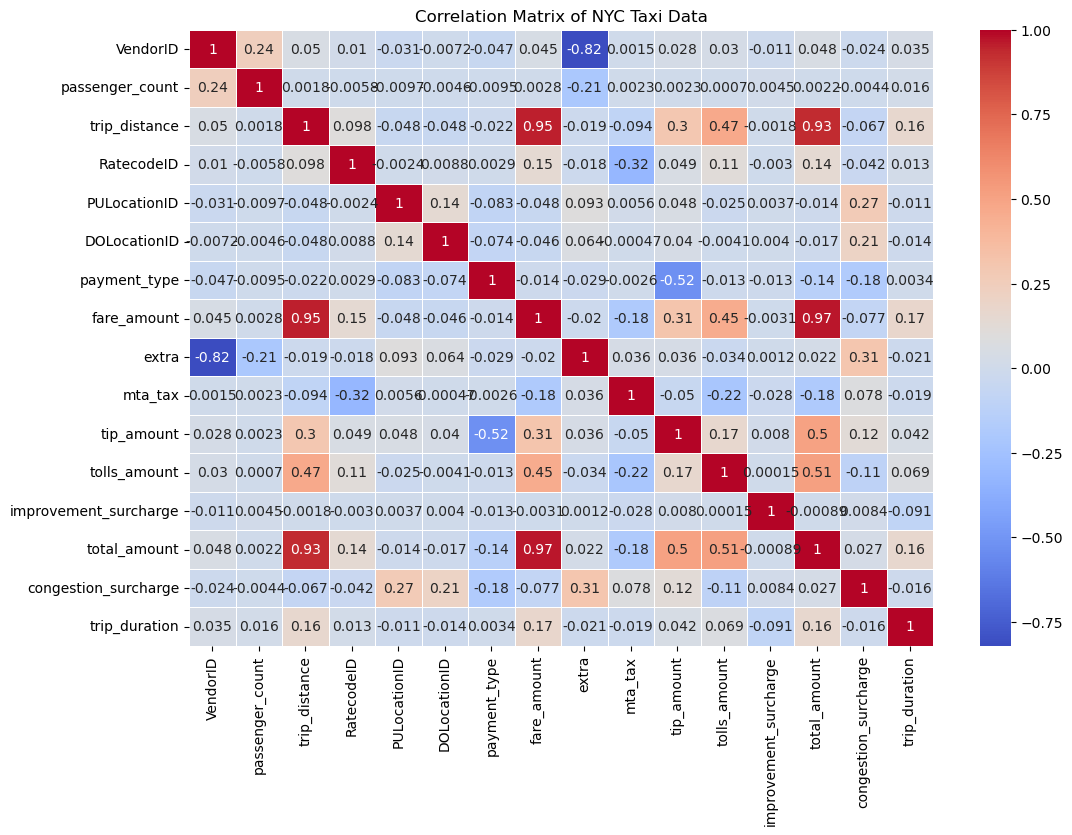

In [68]:
# Correlation Matrix
# Calculating and visualizing the correlation matrix to identify relationships between numerical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of NYC Taxi Data')
plt.show()


#### - A very high positive correlation (0.95) between 'trip_distance' and 'fare_amount', indicating that longer trips tend to have higher fares.
#### - A strong positive correlation (0.97) between 'fare_amount' and 'total_amount', as expected since the total amount is largely influenced by the fare.
#### - A negative correlation (-0.82) between 'extra' and 'VendorID', which may suggest a vendor-specific pricing pattern or discount.
#### - Moderate positive correlations between 'trip_distance', 'tolls_amount', and 'total_amount', indicating that longer trips often involve tolls, contributing to the overall cost.
#### These relationships can be useful for understanding the factors that influence fare and trip behavior in NYC taxi services.


In [72]:
# Anomaly Detection
# Detecting anomalies by identifying trips with a duration greater than 60 minutes and a distance less than 1 mile
anomalies = df[(df['trip_duration'] > 60) & (df['trip_distance'] < 1)]
print(anomalies)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3215           2  2020-04-01 11:04:03   2020-04-02 08:11:53              1.0   
9196           2  2020-04-02 04:10:53   2020-04-02 06:14:27              1.0   
15713          2  2020-04-02 18:58:04   2020-04-03 18:08:52              1.0   
20594          2  2020-04-03 11:02:02   2020-04-03 15:06:00              1.0   
26014          2  2020-04-03 19:31:16   2020-04-04 19:11:50              1.0   
26352          2  2020-04-03 20:38:13   2020-04-04 20:35:01              1.0   
31110          2  2020-04-04 17:45:37   2020-04-05 17:33:56              1.0   
33123          2  2020-04-05 02:15:13   2020-04-06 00:00:00              1.0   
43489          2  2020-04-06 15:57:59   2020-04-07 15:02:45              5.0   
46857          2  2020-04-07 08:07:34   2020-04-08 07:24:13              1.0   
48472          2  2020-04-07 12:52:16   2020-04-08 11:21:50              4.0   
57444          2  2020-04-08 15:37:47   

## Conclusion
#### This project provided a comprehensive analysis of NYC taxi data by cleaning and processing the dataset, storing it efficiently in a database, and conducting exploratory data analysis (EDA) to uncover key insights. We identified peak times for taxi rides, with demand peaking between 2 PM and 5 PM and significant activity during morning commuting hours. Popular routes were analyzed to understand the most frequently traveled areas, while fare distribution analysis showed that most trips had fares below $50, highlighting the prevalence of short-distance travel within the city. The correlation matrix revealed important relationships between variables such as trip distance, fare amount, and total cost, providing a better understanding of fare dynamics. Anomalies were also detected, indicating unusual trips that could be errors or exceptional cases. Overall, the findings of this project can assist in better resource allocation, pricing strategies, and improving the overall efficiency of taxi services in NYC.
